In [57]:
library(tidyverse)

In [58]:
paramspace <- read.csv("../data/metadata/paramspace_cfDNA_phaseI.csv")

In [59]:
paramspace <- paramspace %>% select(pt_id, cfDNA_folder)

In [60]:
head(paramspace)

pt_id,cfDNA_folder
C04689,C303A04689D_cfdna_N295-103
C04689,C305A04689D_cfdna_N295-71
C04689,C309A04689D_cfdna_N295-47
C04689,C302A04689D_cfdna_N295-102
C04689,C299A04689D_cfdna_N295-99
C04689,C307A04689D_cfdna_N295-110


In [61]:
patients <- as.character(unique(paramspace$pt_id))

In [62]:
patients

[1] "C04689" "C04816" "C04837" "C04849" "C04873" "C04874" "C04886" "C04887"
 [9] "C05048" "C05073" "C05084" "C05118" "C05194" "C05234" "C05703"

In [63]:
read_counts <- data.frame(matrix(ncol = 3, nrow = 0))
colnames(read_counts) <-c("pt_id", "cfDNA_sample", "readcount")

In [64]:
for (i in patients){
    paramspace_patient <- paramspace %>% filter(pt_id == i)
    for (j in paramspace_patient$cfDNA_folder){
        reads <- read.csv(paste("../data/", i, "/", j, "/cs1e9/cfDNA_count.csv", sep = ""), header=FALSE)
        read_counts[nrow(read_counts)+1,] = c(i, j, reads)
    }}

## Combine the ratios for all patients in one data frame

In [65]:
big_ratio <- data.frame(matrix(ncol = 3, nrow = 0))
colnames(big_ratio) <-c("pt_id", "cfDNA_sample", "big_ratio")

In [66]:
for (i in patients){
    paramspace_patient <- paramspace %>% filter(pt_id == i)
    for (j in paramspace_patient$cfDNA_folder){
        reads <- read.csv(paste("../data/", i, "/", j, "/ci5_cs1e9/big_ratio_singletons_excluded_tumor_4_cs.csv", sep = ""))
        reads <- reads %>% select(ratio)
        big_ratio[nrow(big_ratio)+1,] = c(i, j, reads)
    }}

In [67]:
small_ratio <- data.frame(matrix(ncol = 3, nrow = 0))
colnames(small_ratio) <-c("pt_id", "cfDNA_sample", "small_ratio")

In [68]:
for (i in patients){
    paramspace_patient <- paramspace %>% filter(pt_id == i)
    for (j in paramspace_patient$cfDNA_folder){
        reads <- read.csv(paste("../data/", i, "/", j, "/ci5_cs1e9/small_ratio_singletons_excluded_tumor_4_cs.csv", sep = ""))
        reads <- reads %>% select(ratio)
        small_ratio[nrow(small_ratio)+1,] = c(i, j, reads)
    }}

## Plots

In [69]:
big_ratio <- big_ratio %>% select("cfDNA_sample", "big_ratio")

In [70]:
small_ratio <- small_ratio %>% select("cfDNA_sample", "small_ratio")

In [71]:
ratios_and_counts <- left_join(read_counts, big_ratio, by="cfDNA_sample")
ratios_and_counts <- left_join(ratios_and_counts, small_ratio, by="cfDNA_sample")

In [72]:
cor(ratios_and_counts$big_ratio, ratios_and_counts$readcount)

[1] 0.02739887

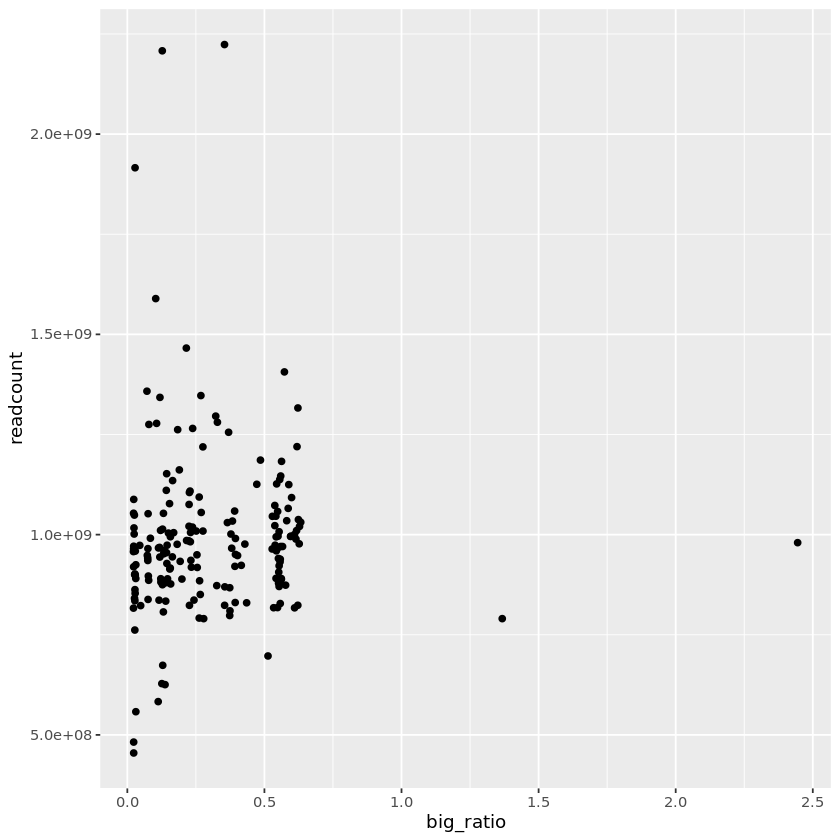

In [73]:
ggplot(data = ratios_and_counts)+
    geom_point(aes(x = big_ratio, y = readcount))

In [74]:
cor(ratios_and_counts$small_ratio, ratios_and_counts$readcount)

[1] 0.1493264

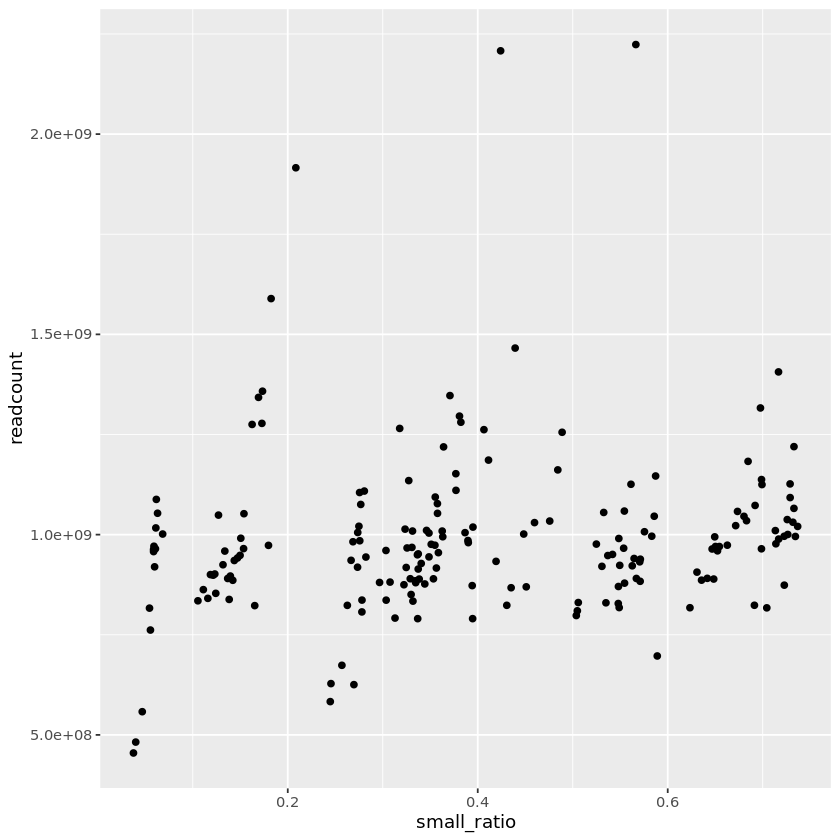

In [75]:
ggplot(data = ratios_and_counts)+
    geom_point(aes(x = small_ratio, y = readcount))